In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [208]:
train_df = pd.read_csv("./annotated_data/data_splits/stratified_entities/ct_neuro_train_merged_787.csv")
dev_df = pd.read_csv("./annotated_data/data_splits/stratified_entities/ct_neuro_dev_merged_153.csv")
test_df = pd.read_csv("./annotated_data/data_splits/stratified_entities/ct_neuro_test_merged_153.csv")
all_annotations = pd.concat([train_df, dev_df, test_df], ignore_index=True)

all_annotations

,tokens,ner_tags,id,nct_id,text,ner_manual_ct_target
0,"['Comparison', 'of', 'the', 'Effectiveness', '...","['O', 'O', 'O', 'O', 'O', 'B-OTHER', 'I-OTHER'...",NCT05589805,NCT05589805,Comparison of the Effectiveness of Low-intensi...,"[(35, 54, 'OTHER', 'Low-intensity Laser'), (59..."
1,"['Phase', 'II', 'Study', 'of', 'Intrathecal', ...","['O', 'O', 'O', 'O', 'O', 'B-DRUG', 'O', 'O', ...",NCT00996983,NCT00996983,Phase II Study of Intrathecal Ziconotide for t...,"[(30, 40, 'DRUG', 'Ziconotide'), (62, 78, 'CON..."
2,"['Intraosseous', 'Administration', 'of', 'Hype...","['O', 'O', 'O', 'B-DRUG', 'I-DRUG', 'O', 'B-CO...",NCT03276494,NCT03276494,Intraosseous Administration of Hypertonic Sali...,"[(31, 48, 'DRUG', 'Hypertonic Saline'), (52, 7..."
3,"['Focused', 'Ultrasound', 'Delivery', 'of', 'E...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'I-OTHER', '...",NCT04202770,NCT04202770,Focused Ultrasound Delivery of Exosomes for Tr...,"[(0, 39, 'OTHER', 'Focused Ultrasound Delivery..."
4,"['A', 'Multicenter', ',', 'Randomized', ',', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT05564169,NCT05564169,"A Multicenter, Randomized, Double-blind, Place...","[(41, 48, 'CONTROL', 'Placebo'), (93, 102, 'DR..."
...,...,...,...,...,...,...
1088,"['Treatment', 'of', 'Tinnitus', 'With', 'Migra...","['O', 'O', 'B-COND', 'O', 'B-OTHER', 'I-OTHER'...",NCT04404439,NCT04404439,Treatment of Tinnitus With Migraine Medication...,"[(13, 21, 'CONDITION', 'Tinnitus'), (27, 47, '..."
1089,"['A', 'Phase', 'II', 'Multicenter', ',', 'Rand...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00073853,NCT00073853,"A Phase II Multicenter, Randomized-Controlled ...","[(91, 123, 'SURGICAL', 'Autologous Incubated M..."
1090,"['A', 'Phase', 'IB', ',', 'Open', '-', 'Label'...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00437372,NCT00437372,"A Phase IB, Open-Label, Safety Study of the Co...","[(59, 68, 'DRUG', 'Sunitinib'), (73, 82, 'RADI..."
1091,"['An', 'Open', '-', 'Label', 'Controlled', 'St...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DR...",NCT01997255,NCT01997255,An Open-Label Controlled Study of Adjunctive E...,"[(45, 55, 'DRUG', 'Everolimus'), (57, 64, 'DRU..."


In [209]:
len(train_df), len(test_df)

(787, 153)

In [210]:
all_annotations['token_count'] = all_annotations['tokens'].apply(lambda x: len(eval(x)))
avg_tokens = all_annotations['token_count'].mean()
std_dev_tokens = all_annotations['token_count'].std()
min_tokens = all_annotations['token_count'].min()
max_tokens = all_annotations['token_count'].max()

print(f"Average number of tokens per row: {avg_tokens}")
print(f"Standard deviation of tokens per row: {std_dev_tokens}")
print("min: ", min_tokens)
print("max: ", max_tokens)


Average number of tokens per row: 134.83714547118024
Standard deviation of tokens per row: 106.39388345107179
min:  17
max:  829


In [135]:
import ast

# Assuming 'all_annotations' is your DataFrame
all_annotations['tokens'] = all_annotations['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Concatenate all token lists across rows
all_tokens = [token for token_list in all_annotations['tokens'] for token in token_list]

# Calculate the number of unique tokens
unique_tokens = len(set(all_tokens))

In [136]:
len(all_tokens)

147377

In [137]:
unique_tokens

12829

In [138]:
all_annotations

,tokens,ner_tags,id,nct_id,text,ner_manual_ct_target,token_count
0,"[Evaluation, of, a, Computerized, Attention, T...","['O', 'O', 'O', 'B-BEH', 'I-BEH', 'I-BEH', 'O'...",NCT02484599,NCT02484599,Evaluation of a Computerized Attention Trainin...,"[(16, 47, 'BEHAVIOURAL', 'Computerized Attenti...",106
1,"[Combined, Virological, and, Immunological, Ev...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00001785,NCT00001785,Combined Virological and Immunological Evaluat...,"[(80, 114, 'CONDITION', 'Early HTLV-1-Associat...",295
2,"[Pivotal, Study, of, the, Apnex, Medical, ™, H...","['O', 'O', 'O', 'O', 'B-OTHER', 'I-OTHER', 'I-...",NCT01446601,NCT01446601,Pivotal Study of the Apnex Medical™ Hypoglossa...,"[(21, 65, 'OTHER', 'Apnex Medical™ Hypoglossal...",79
3,"[Early, Induced, Hypernatremia, for, the, Prev...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'O', 'O', 'O...",NCT02798601,NCT02798601,Early Induced Hypernatremia for the Prevention...,"[(0, 27, 'OTHER', 'Early Induced Hypernatremia...",77
4,"[Comparative, Low, and, High, Dose, of, Dexmed...","['O', 'O', 'O', 'O', 'O', 'O', 'B-DRUG', 'O', ...",NCT03132259,NCT03132259,Comparative Low and High Dose of Dexmedethomid...,"[(33, 49, 'DRUG', 'Dexmedethomidine'), (95, 14...",145
...,...,...,...,...,...,...,...
1088,"[A, Brief, Intervention, Targeting, Anhedonia,...","['O', 'O', 'O', 'O', 'B-COND', 'O', 'O', 'O', ...",NCT05507385,NCT05507385,A Brief Intervention Targeting Anhedonia in Ad...,"[(31, 40, 'CONDITION', 'Anhedonia'), (101, 111...",216
1089,"[A, Treatment, Protocol, for, Management, of, ...","['O', 'O', 'O', 'O', 'O', 'O', 'B-COND', 'O', ...",NCT03747848,NCT03747848,A Treatment Protocol for Management of Fatigue...,"[(39, 46, 'CONDITION', 'Fatigue'), (50, 69, 'C...",155
1090,"[A, Phase, II, ,, Double, -, Blind, ,, Randomi...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00359944,NCT00359944,"A Phase II, Double-Blind, Randomized, Placebo-...","[(38, 45, 'CONTROL', 'Placebo'), (130, 137, 'D...",68
1091,"[Rehabilitation, and, Cortical, Remodeling, Af...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-CO...",NCT04041063,NCT04041063,Rehabilitation and Cortical Remodeling After S...,"[(71, 89, 'CONDITION', 'Spinal Cord Injury'), ...",87


## Entities Frequencies and Overlaps Stats

In [201]:
stats_path = "./annotated_data/corpus_stats/stratified_entities/" # will be also used to save the figures
dev_entities = pd.read_csv(stats_path + "clintrials_dev_entities_stats.csv")
train_entities = pd.read_csv(stats_path + "clintrials_train_entities_stats.csv")
test_entities = pd.read_csv(stats_path + "clintrials_test_entities_stats.csv")
df_all = pd.concat([dev_entities, train_entities, test_entities], ignore_index=True)


In [202]:
df_all

,entity_token,frequency,entity_class
0,stroke,42,CONDITION
1,placebo,21,CONTROL
2,dementia,20,CONDITION
3,pain,19,CONDITION
4,pd,19,CONDITION
...,...,...,...
4554,tetraplegic,1,CONDITION
4555,nerve transfer surgery,1,CONDITION
4556,"robot-assisted, intensive rehabilitation",1,PHYSICAL
4557,intensive mobility training,1,PHYSICAL


In [195]:
sum(train_entities['frequency']), sum(dev_entities['frequency']), sum(test_entities['frequency'])


(7081, 1568, 1444)

In [196]:
train_entities

,entity_token,frequency,entity_class
0,placebo,170,CONTROL
1,stroke,121,CONDITION
2,parkinson's disease,99,CONDITION
3,pd,88,CONDITION
4,pain,78,CONDITION
...,...,...,...
3020,standardised sensory stimulation,1,OTHER
3021,occuaptional therapy,1,OTHER
3022,sensory stimulation,1,OTHER
3023,sensory modalities assessment and rehabilitati...,1,OTHER


In [203]:
df_all = df_all.groupby(['entity_token', 'entity_class']).sum().reset_index()
df_all.shape

(4175, 3)

In [204]:
df_all['token_length'] = df_all['entity_token'].apply(len)
df_all.head()

,entity_token,entity_class,frequency,token_length
0,"""conventional"" management",CONTROL,1,25
1,"""situational"" feedback",OTHER,1,22
2,'stroke-like' episodes,CONDITION,1,22
3,(autologous) stem cells,SURGICAL,1,23
4,(r)-2-amino-3 phenylpropylcarbamate hydrochloride,DRUG,1,49


### produce corpus stats LaTeX table

In [165]:
import random

# Define custom functions to find the longest and shortest entity_token
def longest_token(series):
    return series.loc[series.apply(len).idxmax()]

def shortest_token(series):
    return series.loc[series.apply(len).idxmin()]

def random_tokens(series):
    return random.sample(series.tolist(), k=min(len(series), 5)) 

# Group by 'entity_class' and aggregate statistics
grouped_data = df_all.groupby('entity_class').agg(
    mean_token_length=('token_length', 'mean'),
    std_token_length=('token_length', 'std'),
    longest_entity_token=('entity_token', longest_token),
    shortest_entity_token=('entity_token', shortest_token),
    random_entity_tokens=('entity_token', random_tokens)
)

# Round to the second decimal point
grouped_data = grouped_data.round(2)

# Calculate +/- deviations
grouped_data['+/- deviations'] = grouped_data.apply(lambda x: (round(x['mean_token_length'] - x['std_token_length'], 2), round(x['mean_token_length'] + x['std_token_length'], 2)), axis=1)

# Create a new column for 'mean -/+ deviations'
grouped_data['mean -/+ deviations'] = grouped_data.apply(lambda x: f"{round(x['mean_token_length'], 2)} {x['+/- deviations']}", axis=1)
# Reset index to make 'entity_class' a column
grouped_data.reset_index(inplace=True)
grouped_data

,entity_class,mean_token_length,std_token_length,longest_entity_token,shortest_entity_token,random_entity_tokens,+/- deviations,mean -/+ deviations
0,BEHAVIOURAL,25.47,15.82,"supervisory neglect, non-accidental trauma, br...",sr,"[mindfulness, habit reversal training, peer su...","(9.65, 41.29)","25.47 (9.65, 41.29)"
1,CONDITION,19.23,12.12,anaplastic lymphoma kinase (alk)-positive loca...,pd,"[men a, c and w135, chronic inflammation, peri...","(7.11, 31.35)","19.23 (7.11, 31.35)"
2,CONTROL,19.62,11.68,matched-intensity augmentative motivational in...,wc,"[un-enhanced control, gel with a menthol scent...","(7.94, 31.3)","19.62 (7.94, 31.3)"
3,DRUG,11.78,8.58,"meningococcal polysaccharide (serogroups a, c,...",ci,"[rtl, empagliflozin, constaâ, guanidinoacetic ...","(3.2, 20.36)","11.78 (3.2, 20.36)"
4,OTHER,25.32,16.05,transcranial magnetic stimulation (tms) target...,mi,"[rns® system responsive stimulation, 24-hour s...","(9.27, 41.37)","25.32 (9.27, 41.37)"
5,PHYSICAL,25.29,14.45,"manometric- assisted anal relaxation, muscle c...",id,[physical therapist (pt) supervised home progr...,"(10.84, 39.74)","25.29 (10.84, 39.74)"
6,RADIOTHERAPY,18.13,10.84,spine stereotactic body radiation therapy,rt,"[sbrt, radiation, gamma knife radiosurgery, 3d...","(7.29, 28.97)","18.13 (7.29, 28.97)"
7,SURGICAL,26.96,19.13,autologous cd4+ and cd8+ t cells lentivirally ...,ci,"[two-component skin adhesive glubran tiss 2, r...","(7.83, 46.09)","26.96 (7.83, 46.09)"


In [157]:
df = pd.read_csv("./annotated_data/final_combined/ct_neuro_final_target_annotated_ds_combined_rounds_incl_round_3.csv")
print(df.shape)
# Entities to search for
entities = ['DRUG', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'PHYSICAL', 'OTHER', 'CONDITION', 'CONTROL']

# Dictionary to hold the unique nct_ids for each entity
unique_nct_ids = {}

# Iterate over each entity and filter rows that contain the entity in the 'ner_manual_ct_target' column
for entity in entities:
    # Filter df where 'ner_manual_ct_target' contains the entity
    filtered_df = df[df['ner_manual_ct_target'].str.contains(entity)]
    # Extract unique nct_ids and store them
    unique_nct_ids[entity] = filtered_df['nct_id'].nunique()  # Use nunique() to count unique values

# Create DataFrame from the result dictionary
df_nct_id_per_entity_class = pd.DataFrame.from_dict(unique_nct_ids, orient='index', columns=['Unique_NCTIDs'])

# Reset index and rename columns
df_nct_id_per_entity_class = df_nct_id_per_entity_class.reset_index().rename(columns={'index': 'entity_class'})

# Sort the DataFrame by the number of unique NCTIDs in descending order
df_nct_id_per_entity_class = df_nct_id_per_entity_class.sort_values(by='Unique_NCTIDs', ascending=False)
# Print the DataFrame
df_nct_id_per_entity_class

(1093, 8)


,entity_class,Unique_NCTIDs
6,CONDITION,1032
5,OTHER,456
0,DRUG,385
7,CONTROL,321
4,PHYSICAL,144
1,BEHAVIOURAL,86
2,SURGICAL,45
3,RADIOTHERAPY,19


In [161]:
# Perform groupby and sum on 'frequency' column
entity_class_frq = df_all.groupby('entity_class')['frequency'].sum().reset_index()

# Perform groupby and count unique values on 'entity_token' column
unique_class = df_all.groupby('entity_class')['entity_token'].nunique().reset_index()

# Merge the two dataframes on 'entity_class'
df_frq_unique_per_entity_class = pd.merge(entity_class_frq, unique_class, on='entity_class')
df_frq_unique_per_entity_class = df_frq_unique_per_entity_class.rename(columns={"frequency": "Count", "entity_token": "Unique"})
df_frq_unique_per_entity_class

,entity_class,Count,Unique
0,BEHAVIOURAL,317,214
1,CONDITION,4936,1612
2,CONTROL,554,218
3,DRUG,1636,601
4,OTHER,1806,1047
5,PHYSICAL,594,332
6,RADIOTHERAPY,77,30
7,SURGICAL,173,121


In [170]:
merged_df = pd.merge(df_frq_unique_per_entity_class, df_nct_id_per_entity_class, on='entity_class', how='inner')
merged_df = pd.merge(merged_df, grouped_data[['entity_class','mean -/+ deviations', 'random_entity_tokens']], on='entity_class', how='inner')
merged_df = merged_df.rename(columns={"entity_class" : "Entity Class", "mean -/+ deviations":"Avg. Character Number", "random_entity_tokens":"Annotation Examples"})

sort_order = ['CONDITION', 'OTHER', 'DRUG', 'PHYSICAL', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'CONTROL']

merged_df['sort_order'] = merged_df['Entity Class'].map(lambda x: sort_order.index(x))
merged_df = merged_df.sort_values(by='sort_order').drop(columns=['sort_order']).reset_index(drop=True)
merged_df

,Entity Class,Count,Unique,Unique_NCTIDs,Avg. Character Number,Annotation Examples
0,CONDITION,4936,1612,1032,"19.23 (7.11, 31.35)","[men a, c and w135, chronic inflammation, peri..."
1,OTHER,1806,1047,456,"25.32 (9.27, 41.37)","[rns® system responsive stimulation, 24-hour s..."
2,DRUG,1636,601,385,"11.78 (3.2, 20.36)","[rtl, empagliflozin, constaâ, guanidinoacetic ..."
3,PHYSICAL,594,332,144,"25.29 (10.84, 39.74)",[physical therapist (pt) supervised home progr...
4,BEHAVIOURAL,317,214,86,"25.47 (9.65, 41.29)","[mindfulness, habit reversal training, peer su..."
5,SURGICAL,173,121,45,"26.96 (7.83, 46.09)","[two-component skin adhesive glubran tiss 2, r..."
6,RADIOTHERAPY,77,30,19,"18.13 (7.29, 28.97)","[sbrt, radiation, gamma knife radiosurgery, 3d..."
7,CONTROL,554,218,321,"19.62 (7.94, 31.3)","[un-enhanced control, gel with a menthol scent..."


In [174]:
merged_df.columns

Index(['Entity Class', 'Count', 'Unique', 'Unique_NCTIDs',
       'Avg. Character Number', 'Annotation Examples'],
      dtype='object')

In [177]:
print(merged_df.to_latex(index=False, ,column_format='lrrrrl', label='tab:corpus_distribution_overview', header=['Entity Class', 'Count', 'Unique', 'Unique_NCTIDs','Avg. Character Number', 'Annotation Examples']))

\begin{table}
\label{tab:corpus_distribution_overview}
\begin{tabular}{lrrrll}
\toprule
Entity Class & Count & Unique & Unique_NCTIDs & Avg. Character Number & Annotation Examples \\
\midrule
CONDITION & 4936 & 1612 & 1032 & 19.23 (7.11, 31.35) & ['men a, c and w135', 'chronic inflammation', 'periventricular leukomalacia', 'stroke', 'movement slowness'] \\
OTHER & 1806 & 1047 & 456 & 25.32 (9.27, 41.37) & ['rns® system responsive stimulation', '24-hour simultaneous recorder of electrocardiograph and electroencephalography', 'air stacking', 'individualized homeopathic remedies', 'programmed intermittent bolus infusion of thoracic paravertebral block'] \\
DRUG & 1636 & 601 & 385 & 11.78 (3.2, 20.36) & ['rtl', 'empagliflozin', 'constaâ', 'guanidinoacetic acid', 'mito'] \\
PHYSICAL & 594 & 332 & 144 & 25.29 (10.84, 39.74) & ['physical therapist (pt) supervised home programs', 'ekso-gt', 'passive exoskeleton', 'resistance exercise training', 'slider and tensioner techniques'] \\
BEHAVIOURAL

### check overlapping entities

In [180]:
def find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, entity_class):
    # Extract unique tokens for the given entity class
    unique_tokens = df_all[df_all['entity_class'] == entity_class]['entity_token'].unique()

    # Convert data to sets
    unique_tokens_train = set(train_entities[train_entities['entity_class'] == entity_class]['entity_token'].unique())
    unique_tokens_dev = set(dev_entities[dev_entities['entity_class'] == entity_class]['entity_token'].unique())
    unique_tokens_test = set(test_entities[test_entities['entity_class'] == entity_class]['entity_token'].unique())

    unique_tokens_train_only = unique_tokens_train - unique_tokens_dev - unique_tokens_test
    unique_tokens_dev_only = unique_tokens_dev - unique_tokens_train  - unique_tokens_test
    unique_tokens_test_only = unique_tokens_test - unique_tokens_dev - unique_tokens_train

    unique_tokens_overlap_all = unique_tokens_train & unique_tokens_dev & unique_tokens_test

    # Find that overlap between unique_drugs_train and unique_drugs_dev
    overlap_train_dev = unique_tokens_train & unique_tokens_dev
    # Find that overlap between overlap_train_dev and unique_drugs_test
    overlap_train_dev_not_test = overlap_train_dev - unique_tokens_test

    # Find that overlap between unique_drugs_train and unique_drugs_dev
    overlap_test_dev = unique_tokens_test & unique_tokens_dev

    # Find that overlap between overlap_train_dev and unique_drugs_test
    overlap_test_dev_not_train = overlap_test_dev - unique_tokens_train
    
    # Find drugs that overlap between unique_drugs_train and unique_drugs_dev
    overlap_train_test = unique_tokens_train & unique_tokens_test

    # Find drugs that overlap between overlap_train_dev and unique_drugs_test
    overlap_train_test_not_dev = overlap_train_test - unique_tokens_dev
    
    
    return {
        "len_unique_tokens_train": len(unique_tokens_train_only),
        "len_unique_tokens_dev": len(unique_tokens_dev_only),
        "len_unique_tokens_test": len(unique_tokens_test_only),
        "len_overlap_train_dev_not_test": len(overlap_train_dev_not_test),
        "len_overlap_test_dev_not_train": len(overlap_test_dev_not_train),
        "len_overlap_train_test_not_dev": len(overlap_train_test_not_dev),
        "unique_tokens_overlap_all":len(unique_tokens_overlap_all)
    }

In [181]:
find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, "DRUG")

{'len_unique_tokens_train': 415,
 'len_unique_tokens_dev': 62,
 'len_unique_tokens_test': 77,
 'len_overlap_train_dev_not_test': 19,
 'len_overlap_test_dev_not_train': 2,
 'len_overlap_train_test_not_dev': 20,
 'unique_tokens_overlap_all': 6}

In [182]:
find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, "CONDITION")

{'len_unique_tokens_train': 1068,
 'len_unique_tokens_dev': 191,
 'len_unique_tokens_test': 171,
 'len_overlap_train_dev_not_test': 66,
 'len_overlap_test_dev_not_train': 6,
 'len_overlap_train_test_not_dev': 53,
 'unique_tokens_overlap_all': 57}

### get top 10

In [205]:
def get_top(df, n=5, entity_class=None):
    if entity_class:
        # Filter the dataframe based on the specified entity_class
        filtered_df = df[df['entity_class'] == entity_class]
    else:
        # If entity_class is not specified, use the entire dataframe
        filtered_df = df

    # Sort the filtered dataframe by frequency in descending order
    sorted_df = filtered_df.sort_values(by=['frequency'], ascending=[False])

    # Get the top 5 entity_token based on frequency
    top_5_tokens = sorted_df.head(n)

    return top_5_tokens

In [206]:
sort_order = ['CONDITION', 'OTHER', 'DRUG', 'PHYSICAL', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'CONTROL']


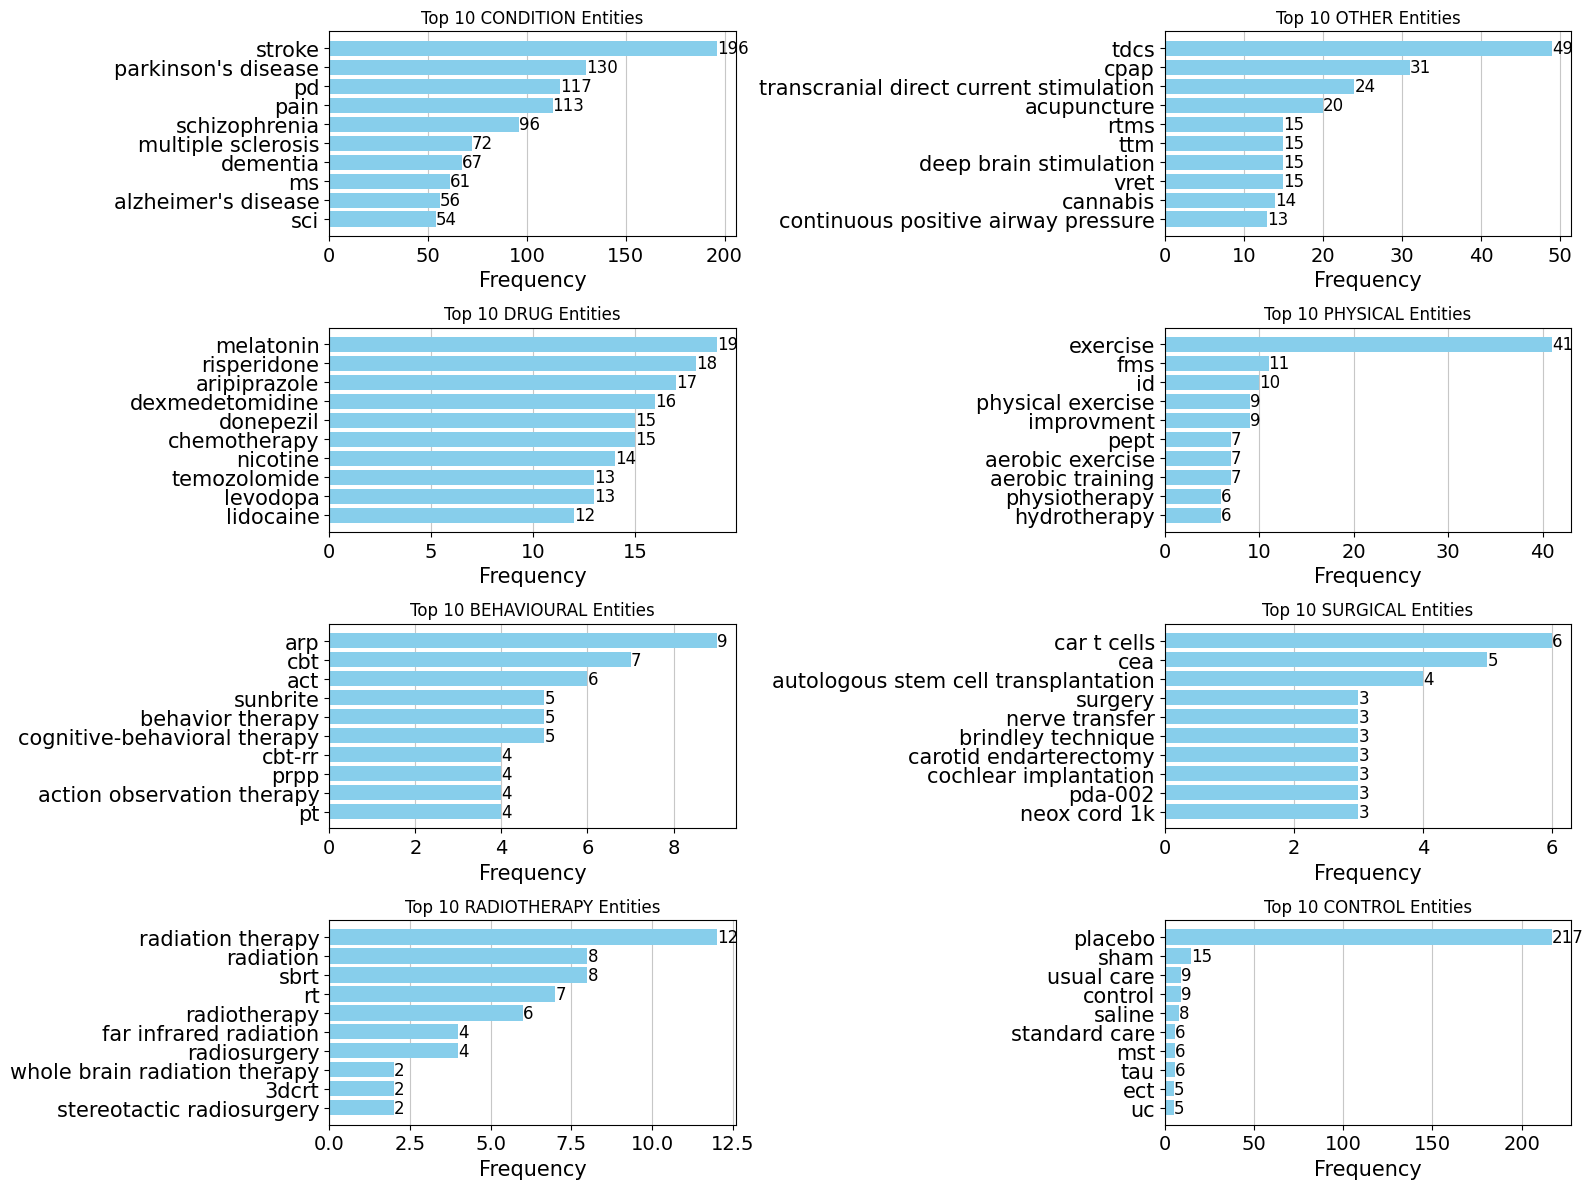

In [207]:
# Define a function to create bar charts for each entity class
def create_bar_chart(ax, data, entity_class, color):
    bars = ax.barh(data['entity_token'], data['frequency'], color=color, zorder=2)
    ax.set_xlabel('Frequency', fontsize=15)
    #ax.set_ylabel(f'{entity_class} Entity', fontsize=15)
    ax.invert_yaxis()  # Invert the y-axis to display the highest frequency at the top
    ax.grid(axis='x', alpha=0.7, zorder=0)
    
    # Add numbers inside the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 1
        label_text = f'{int(width)}'
        ax.text(width, bar.get_y() + bar.get_height() / 2, label_text, va='center', fontsize=12, color='black', zorder=2)
    
    ax.tick_params(axis='y', labelrotation=0, labelsize=15)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_title(f'Top 10 {entity_class} Entities', fontsize=12)

fig, axs = plt.subplots(4, 2, figsize=(16, 12))

# Adjust the subplots
plt.subplots_adjust(left=0.2, wspace=0.3, hspace=0.4)

# Loop through entity classes and create bar charts
for i, entity_class in enumerate(sort_order):
    # Get top entities for the current class
    top10_entities = get_top(df_all, n=10, entity_class=entity_class)
    
    # Calculate subplot indices
    row = i // 2
    col = i % 2
    
    # Create bar chart for the current entity class and add it to the subplot
    create_bar_chart(axs[row, col], top10_entities, entity_class, color='skyblue')  # Adjust color as needed


# Save the combined figure as an image
plt.tight_layout()
#plt.savefig("top_10_entities_2x2.pdf")

# Show the plot
plt.show()

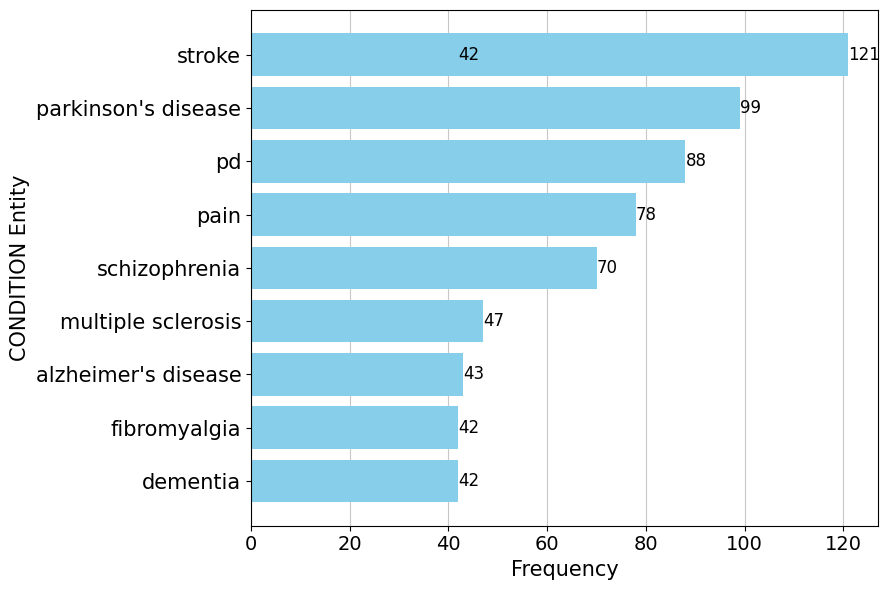

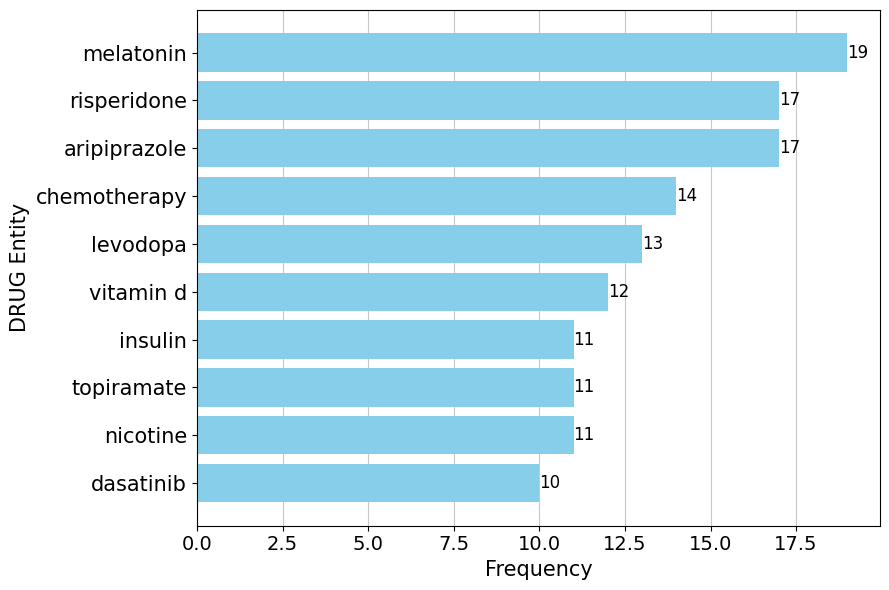

In [179]:
sort_order = ['CONDITION', 'OTHER', 'DRUG', 'PHYSICAL', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'CONTROL']

# Get the top 10 CONDITION entities
top10_condition = get_top(df_all, n=10, entity_class="CONDITION")

# Get the top 10 DRUG entities
top10_drug = get_top(df_all, n=10, entity_class="DRUG")

# Create a bar chart for CONDITION entities
plt.figure(figsize=(9, 6))
plt.grid(axis='x', alpha=0.7, zorder=0)
plt.subplots_adjust(left=0.2)  # Adjust the left margin
bars1 = plt.barh(top10_condition['entity_token'], top10_condition['frequency'], color='skyblue', zorder=2)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('CONDITION Entity', fontsize=15)
#plt.title('Top 10 CONDITION Entities', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top

# Add numbers inside the bars for CONDITION entities
for bar in bars1:
    width = bar.get_width()
    label_x_pos = width + 1
    label_text = f'{int(width)}'
    plt.text(width, bar.get_y() + bar.get_height() / 2, label_text, va='center', fontsize=12, color='black', zorder=2)
plt.yticks(rotation=0, fontsize=15)
plt.xticks(fontsize=14)
plt.tight_layout()

# Save the first figure as an image
plt.savefig(stats_path + "top_10_condition.pdf")

# Show the first plot
plt.show()

# Create a bar chart for DRUG entities
plt.figure(figsize=(9, 6))
plt.grid(axis='x', alpha=0.7, zorder=0)
plt.subplots_adjust(left=0.2)  # Adjust the left margin

bars2 = plt.barh(top10_drug['entity_token'], top10_drug['frequency'], color='skyblue', zorder=2)  # Use hex color code for light orange
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('DRUG Entity', fontsize=15)
#plt.title('Top 10 DRUG Entities', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top

# Add numbers inside the bars for DRUG entities
for bar in bars2:
    width = bar.get_width()
    label_x_pos = width + 1
    label_text = f'{int(width)}'
    plt.text(width, bar.get_y() + bar.get_height() / 2, label_text, va='center', fontsize=12, color='black',zorder=2)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=14)
plt.tight_layout()

# Save the second figure as an image
plt.savefig(stats_path + "top_10_drug.pdf")

# Show the second plot
plt.show()

In [82]:
top5_train = get_top(train_entities)
top5_train['source'] = "train"
top5_train

,entity_token,frequency,entity_class,source
0,placebo,182,CONTROL,train
1,stroke,148,CONDITION,train
2,parkinson's disease,100,CONDITION,train
3,pain,87,CONDITION,train
4,pd,85,CONDITION,train


In [83]:
top5_dev = get_top(dev_entities)
top5_dev['source'] = "dev"
top5_dev

,entity_token,frequency,entity_class,source
0,stroke,21,CONDITION,dev
1,placebo,19,CONTROL,dev
2,parkinson's disease,18,CONDITION,dev
3,pain,15,CONDITION,dev
4,tinnitus,11,CONDITION,dev


In [84]:
top5_test = get_top(test_entities)
top5_test['source'] = "test"
top5_test

,entity_token,frequency,entity_class,source
0,stroke,27,CONDITION,test
1,pd,22,CONDITION,test
2,placebo,16,CONTROL,test
3,parkinson's disease,12,CONDITION,test
4,pain,11,CONDITION,test


In [85]:
pd.concat([top5_train, top5_dev, top5_test])

,entity_token,frequency,entity_class,source
0,placebo,182,CONTROL,train
1,stroke,148,CONDITION,train
2,parkinson's disease,100,CONDITION,train
3,pain,87,CONDITION,train
4,pd,85,CONDITION,train
0,stroke,21,CONDITION,dev
1,placebo,19,CONTROL,dev
2,parkinson's disease,18,CONDITION,dev
3,pain,15,CONDITION,dev
4,tinnitus,11,CONDITION,dev


In [86]:
grouped_df_train = train_entities.groupby('entity_class')['frequency'].sum()
grouped_df_train = grouped_df_train.sort_values(ascending=False)
grouped_df_train

entity_class
CONDITION       4023
OTHER           1496
DRUG            1315
PHYSICAL         468
CONTROL          462
BEHAVIOURAL      264
SURGICAL         138
RADIOTHERAPY      64
Name: frequency, dtype: int64

In [87]:
grouped_df_test = test_entities.groupby('entity_class')['frequency'].sum()
grouped_df_test = grouped_df_test.sort_values(ascending=False)
grouped_df_test

entity_class
CONDITION       486
OTHER           159
DRUG            154
PHYSICAL         67
CONTROL          43
BEHAVIOURAL      38
SURGICAL         16
RADIOTHERAPY      8
Name: frequency, dtype: int64

In [88]:
grouped_df_dev = dev_entities.groupby('entity_class')['frequency'].sum()
grouped_df_dev = grouped_df_dev.sort_values(ascending=False)
grouped_df_dev

entity_class
CONDITION       428
OTHER           171
DRUG            158
PHYSICAL         54
CONTROL          38
BEHAVIOURAL      25
SURGICAL         13
RADIOTHERAPY      5
Name: frequency, dtype: int64

# Extracting Abbreviations

In [92]:
from abbreviations import schwartz_hearst

In [93]:
def extract_abbreviation_definition_pairs(doc_text):
    pairs = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=doc_text)
    return pairs

In [94]:
extract_abbreviation_definition_pairs("heihfdo pakrins disse (PD)")

{'PD': 'pakrins disse'}

In [99]:
full_corpus_df = pd.read_csv("./annotated_data/final_combined/ct_neuro_final_target_annotated_ds_combined_rounds_incl_round_3.csv")[['nct_id', 'text']]

In [100]:
full_corpus_df['pairs'] = full_corpus_df['text'].apply(extract_abbreviation_definition_pairs)
full_corpus_df.head()

,nct_id,text,pairs
0,NCT02632279,Tryptophan Depletion in Parkinson's Disease Pa...,"{'PD': 'Parkinson's disease', 'DBS': 'deep bra..."
1,NCT05018234,Safety Monitoring for a Novel 3D Printed Mandi...,{'OA': 'oral appliance'}
2,NCT04426123,Masseter Myofascial Pain Relief Following an I...,{'BTX': 'botulinum toxin'}
3,NCT03973203,The Effect of Niacin Supplementation on System...,"{'NAD+': 'Nicotinamide Adenine Dinucleotide', ..."
4,NCT00423943,Modafinil for Treatment of Cognitive Dysfuncti...,{}


In [101]:
from collections import Counter
from collections import defaultdict

full_corpus_df['pairs'] = full_corpus_df['text'].apply(extract_abbreviation_definition_pairs)

# Step 1: Extract all pairs from the 'pairs' column into a list of dictionaries
all_pairs_list_of_dicts = full_corpus_df['pairs'].tolist()

# Initialize a defaultdict to store the frequency of each combination
frequency_dict = defaultdict(int)

# Iterate through each dictionary in the list and count the frequency of each combination
for dictionary in all_pairs_list_of_dicts:
    for key, value in dictionary.items():
        combination = f"{key}: {value}"
        frequency_dict[combination] += 1

# Sort the combinations by frequency in descending order
sorted_combinations = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted_combinations list of tuples back to a dictionary
result_dict = dict(sorted_combinations)

# Get only the top 10 combinations
top_10_combinations = dict(sorted_combinations[:10])

# Output the result
print(top_10_combinations)

{"PD: Parkinson's disease": 22, 'SCI: spinal cord injury': 13, "AD: Alzheimer's disease": 11, "PD: Parkinson's Disease": 9, 'tDCS: transcranial direct current stimulation': 9, 'MS: multiple sclerosis': 8, 'MS: Multiple Sclerosis': 8, 'OSA: obstructive sleep apnea': 7, 'CNS: central nervous system': 5, 'MRI: magnetic resonance imaging': 5}


In [110]:
all_aact_neuro = pd.read_csv("./data_aact_sample/random_sample_neurological_with_summaries_202306151741.csv")
all_aact_neuro.shape

(500, 6)

In [111]:
all_aact_neuro.head()

,nct_id,start_date,completion_date,phase,official_title,description
0,NCT02632279,2015-11-30,2017-11-15,Not Applicable,Tryptophan Depletion in Parkinson's Disease Pa...,The purpose of this study is to assess the eff...
1,NCT05018234,2021-08-04,2022-04-01,Not Applicable,Safety Monitoring for a Novel 3D Printed Mandi...,The purpose of this study is to evaluate the s...
2,NCT04426123,2020-07-01,2021-12-31,Phase 2,Masseter Myofascial Pain Relief Following an I...,Investigating the effect of a single intramusc...
3,NCT03973203,2014-06-01,2018-12-31,Not Applicable,The Effect of Niacin Supplementation on System...,The most frequent form of adult-onset mitochon...
4,NCT00423943,2005-09-30,2012-12-31,Phase 4,Modafinil for Treatment of Cognitive Dysfuncti...,Patients with schizophrenia have problems in t...


In [112]:
all_aact_neuro.drop_duplicates(subset='nct_id', keep='first', inplace=True)
all_aact_neuro.shape

(499, 6)

In [113]:
all_aact_neuro['title_description'] = df['official_title'] + "| " + df['description']
all_aact_neuro['title_description'] = all_aact_neuro['title_description'].astype(str)


In [114]:
all_aact_neuro.dtypes

nct_id               object
start_date           object
completion_date      object
phase                object
official_title       object
description          object
title_description    object
dtype: object

In [115]:
full_corpus_df = all_aact_neuro[["nct_id", "title_description"]]
full_corpus_df.head()

,nct_id,title_description
0,NCT02632279,Tryptophan Depletion in Parkinson's Disease Pa...
1,NCT05018234,Safety Monitoring for a Novel 3D Printed Mandi...
2,NCT04426123,Masseter Myofascial Pain Relief Following an I...
3,NCT03973203,The Effect of Niacin Supplementation on System...
4,NCT00423943,Modafinil for Treatment of Cognitive Dysfuncti...


In [116]:
full_corpus_df['pairs'] = full_corpus_df['title_description'].apply(extract_abbreviation_definition_pairs)


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_20362/359770276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_corpus_df['pairs'] = full_corpus_df['title_description'].apply(extract_abbreviation_definition_pairs)


In [117]:

# Step 1: Extract all pairs from the 'pairs' column into a list of dictionaries
all_pairs_list_of_dicts = full_corpus_df['pairs'].tolist()

# Initialize a defaultdict to store the frequency of each combination
frequency_dict = defaultdict(int)

# Iterate through each dictionary in the list and count the frequency of each combination
for dictionary in all_pairs_list_of_dicts:
    for key, value in dictionary.items():
        value = value.lower()
        combination = f"{key}: {value}"
        frequency_dict[combination] += 1

# Sort the combinations by frequency in descending order
sorted_combinations = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted_combinations list of tuples back to a dictionary
result_dict = dict(sorted_combinations)

In [118]:
# Get only the top 10 combinations
top_n_combinations = dict(sorted_combinations[:30])
top_n_combinations

{"PD: parkinson's disease": 11,
 'MS: multiple sclerosis': 9,
 'SCI: spinal cord injury': 7,
 'tDCS: transcranial direct current stimulation': 6,
 'OSA: obstructive sleep apnea': 5,
 'DBS: deep brain stimulation': 4,
 'MRI: magnetic resonance imaging': 4,
 'CSF: cerebrospinal fluid': 4,
 'PET: positron emission tomography': 4,
 'ALS: amyotrophic lateral sclerosis': 4,
 'CPAP: continuous positive airway pressure': 4,
 "AD: alzheimer's disease": 4,
 'CP: cerebral palsy': 3,
 'PK: pharmacokinetics': 3,
 'TBI: traumatic brain injury': 3,
 'PWS: prader-willi syndrome': 3,
 'STN: subthalamic nucleus': 2,
 'RRMS: relapsing-remitting multiple sclerosis': 2,
 'AF: atrial fibrillation': 2,
 'FDA: food and drug administration': 2,
 'IV: intravenous': 2,
 'PD: parkinson disease': 2,
 "HD: huntington's disease": 2,
 'ER: extended release': 2,
 'THC: tetrahydrocannabinol': 2,
 'CBD: cannabidiol': 2,
 'UC: usual care': 2,
 'GH: growth hormone': 2,
 'SDB: sleep-disordered breathing': 2,
 'MAS: modifie

# Unique trials per entity type

In [149]:
df = pd.read_csv("./annotated_data/final_combined/ct_neuro_final_target_annotated_ds_combined_rounds_incl_round_3.csv")

In [150]:
df_old = pd.read_csv("./annotated_data/final_combined/ct_neuro_final_target_annotated_ds_combined_rounds.csv")

In [151]:
df.shape, df_old.shape

((1093, 8), (892, 8))

In [152]:
df = pd.read_csv("./annotated_data/final_combined/ct_neuro_final_target_annotated_ds_combined_rounds_incl_round_3.csv")
# Entities to search for
entities = ['DRUG', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'PHYSICAL', 'OTHER', 'CONDITION', 'CONTROL']

# Dictionary to hold the unique nct_ids for each entity
unique_nct_ids = {}

# Iterate over each entity and filter rows that contain the entity in the 'ner_manual_ct_target' column
for entity in entities:
    # Filter df where 'ner_manual_ct_target' contains the entity
    filtered_df = df[df['ner_manual_ct_target'].str.contains(entity)]
    # Extract unique nct_ids and store them
    unique_nct_ids[entity] = filtered_df['nct_id'].nunique()  # Use nunique() to count unique values

# Create DataFrame from the result dictionary
result_df = pd.DataFrame.from_dict(unique_nct_ids, orient='index', columns=['Unique_NCTIDs'])

# Sort the DataFrame by the number of unique NCTIDs in descending order
result_df = result_df.sort_values(by='Unique_NCTIDs', ascending=False)

# Print the DataFrame
result_df

,Unique_NCTIDs
CONDITION,1032
OTHER,456
DRUG,385
CONTROL,321
PHYSICAL,144
BEHAVIOURAL,86
SURGICAL,45
RADIOTHERAPY,19


In [123]:
df = df_old.copy()
# Entities to search for
entities = ['DRUG', 'BEHAVIOURAL', 'SURGICAL', 'RADIOTHERAPY', 'PHYSICAL', 'OTHER', 'CONDITION', 'CONTROL']

# Dictionary to hold the unique nct_ids for each entity
unique_nct_ids = {}

# Iterate over each entity and filter rows that contain the entity in the 'ner_manual_ct_target' column
for entity in entities:
    # Filter df where 'ner_manual_ct_target' contains the entity
    filtered_df = df[df['ner_manual_ct_target'].str.contains(entity)]
    # Extract unique nct_ids and store them
    unique_nct_ids[entity] = filtered_df['nct_id'].unique()

# Convert dictionary to a list of tuples and sort by the number of unique nct_ids
sorted_entities = sorted(unique_nct_ids.items(), key=lambda item: len(item[1]), reverse=True)

# Print the results in sorted order
for entity, nct_ids in sorted_entities:
    print(f"{entity}: {len(nct_ids)} unique NCT IDs")

CONDITION: 840 unique NCT IDs
DRUG: 355 unique NCT IDs
OTHER: 350 unique NCT IDs
CONTROL: 264 unique NCT IDs
PHYSICAL: 110 unique NCT IDs
BEHAVIOURAL: 61 unique NCT IDs
SURGICAL: 27 unique NCT IDs
RADIOTHERAPY: 6 unique NCT IDs


In [15]:
filtered_df = df[df['ner_manual_ct_target'].str.contains("Physical")]

In [16]:
filtered_df

,Unnamed: 0,nct_id,source,text,ner_manual_ct_target,ner_manual_ct_target_idx,ner_manual_ct_target_disease,ner_manual_ct_target_intervention
65,65,NCT02850055,OfficialTitle+BriefSummary,Effectiveness Specific Manual Therapy in a Mul...,"[(14, 37, 'OTHER', 'Specific Manual Therapy'),...","[(14, 37), (43, 80), (98, 106), (111, 143), (1...","[(98, 106, 'CONDITION'), (111, 143, 'CONDITION...","[(14, 37, 'OTHER'), (43, 80, 'OTHER'), (455, 5..."
154,154,NCT04573530,OfficialTitle+BriefSummary,We Walk Plus Study: A Walking Program Using Ph...,"[(22, 92, 'OTHER', 'Walking Program Using Phys...","[(22, 92), (115, 140), (190, 215), (289, 314),...","[(115, 140, 'CONDITION'), (289, 314, 'CONDITIO...","[(22, 92, 'OTHER'), (190, 215, 'OTHER')]"
197,197,NCT04238260,OfficialTitle+BriefSummary,Enhancing Physical Therapy Best Practice for I...,"[(10, 40, 'OTHER', 'Physical Therapy Best Prac...","[(10, 40), (69, 75), (140, 206), (266, 282)]","[(69, 75, 'CONDITION')]","[(10, 40, 'OTHER'), (140, 206, 'OTHER'), (266,..."
223,223,NCT04164810,OfficialTitle+BriefSummary,Effects of Hydrotherapy on Neuropathic Pain an...,"[(11, 23, 'PHYSICAL', 'Hydrotherapy'), (27, 43...","[(11, 23), (27, 43), (48, 70), (74, 92), (145,...","[(27, 43, 'CONDITION'), (48, 70, 'CONDITION'),...","[(11, 23, 'PHYSICAL'), (792, 804, 'PHYSICAL'),..."
294,294,NCT01611987,OfficialTitle+BriefSummary,The Role of Exercise in Modifying Outcomes for...,"[(12, 20, 'PHYSICAL', 'Exercise'), (59, 77, 'C...","[(12, 20), (59, 77), (104, 112), (117, 134), (...","[(59, 77, 'CONDITION'), (147, 165, 'CONDITION'...","[(12, 20, 'PHYSICAL'), (104, 112, 'PHYSICAL'),..."
329,329,NCT00989456,OfficialTitle+BriefSummary,Structured Patient Education in Combination Wi...,"[(0, 28, 'BEHAVIOURAL', 'Structured Patient Ed...","[(0, 28), (49, 66), (131, 168), (170, 183), (1...","[(131, 168, 'CONDITION'), (170, 183, 'CONDITIO...","[(0, 28, 'BEHAVIOURAL'), (49, 66, 'PHYSICAL'),..."
428,428,NCT04740060,OfficialTitle+BriefSummary,Major Research Instrumentation Program: Develo...,"[(83, 117, 'PHYSICAL', 'Robot-Aided Virtual Re...","[(83, 117), (122, 151), (251, 297), (302, 331)...","[(372, 383, 'CONDITION')]","[(83, 117, 'PHYSICAL'), (122, 151, 'PHYSICAL')..."
634,634,NCT02582138,OfficialTitle+BriefSummary,Sarcopenia and Physical fRailty IN Older Peopl...,"[(0, 10, 'CONDITION', 'Sarcopenia'), (15, 31, ...","[(0, 10), (15, 31), (49, 85), (148, 185), (187...","[(0, 10, 'CONDITION'), (15, 31, 'CONDITION'), ...","[(49, 85, 'OTHER'), (148, 185, 'OTHER'), (187,..."
644,644,NCT00376207,OfficialTitle+BriefSummary,Decreased insulin sensitivity is and independe...,"[(65, 71, 'CONDITION', 'stroke'), (115, 132, '...","[(65, 71), (115, 132), (191, 197), (244, 261),...","[(65, 71, 'CONDITION'), (191, 197, 'CONDITION'...","[(115, 132, 'PHYSICAL'), (244, 261, 'PHYSICAL'..."
707,707,NCT04603352,OfficialTitle+BriefSummary,Impact of an Orthotic Garment on Gross Motor S...,"[(13, 29, 'OTHER', 'Orthotic Garment'), (80, 9...","[(13, 29), (80, 93), (109, 122), (124, 126), (...","[(80, 93, 'CONDITION'), (109, 122, 'CONDITION'...","[(13, 29, 'OTHER'), (182, 230, 'PHYSICAL'), (3..."
